# Ejemplo 03
_** Dr. Antonio Arista Jalife **_

En este ejemplo veremos como funciona un Random Forest. Un Random Forest es una colección de árboles de decisión, que han sido entrenados independientemente. Para comenzar con el ejemplo, importemos unas librerías extra de Scikit-learn

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree as treeClassifier
from sklearn.ensemble import RandomForestClassifier as forest

Utilizaremos los mismos datos de entrada y salida de los otros ejemplos: Las personas del adivina quien y sus características. Si bien es cierto estamos usando el ejemplo del "Adivina Quien", puedes utilizar prácticamente cualquier cantidad de datos para predecir cualquier salida posible. 

In [2]:
#Para las salidas, utilizaremos la variable Y
y = ["Antonio", "Elly", "Patricia", "María", "Juana", "José", "Luis"]

#Características: 
#Cabello largo | Usa lentes | Usa sombrero | Es mujer | Tiene bigote | Tiene ojos claros
x = np.array([
     [0,1,0,0,0,0], #Antonio: No tiene cabello largo, usa lentes, no usa sombrero, no es mujer, no tiene bigote, no tiene ojos claros
     [1,1,1,1,0,0], #Elly: Tiene cabello largo, usa lentes, usa sombrero, es mujer, no tiene bigote, no tiene ojos claros
     [0,0,1,1,0,1], #Patricia: ...
     [1,1,0,1,0,0], #Maria: ...
     [0,0,1,1,0,0], #Juana: ...
     [1,0,0,0,1,1], #José: ...
     [0,1,1,0,0,1]  #Luis: ...
    ], dtype=np.int16)


Primero vamos a generar un árbol de decisión simple y trataremos de que el árbol de decisión por si solo haga el trabajo. Estoy dejando un random seed de 12, pero puedes cambiarlo a None para obtener resultados diferentes cada vez, 

In [3]:
random_seed = 12

arbol = treeClassifier.DecisionTreeClassifier(random_state = random_seed)
arbol = arbol.fit(x, y)

Ahora, veamos que tal funciona nuestro solitario árbol de decisiones con José, pero con diferentes características como lentes, sombrero, o lentes y sombrero

In [4]:
#Este sospechoso es José: Es exactamente igual a los datos del adivina quien.
caracteristicas = np.array([[1,0,0,0,1,1]], dtype=np.int16)
print("Nuestro sospechoso original es")
print(arbol.predict(caracteristicas))

#Este sospechoso es José pero con lentes.
caracteristicas = np.array([[1,1,0,0,1,1]], dtype=np.int16)
print("Nuestro sospechoso con lentes es")
print(arbol.predict(caracteristicas))

#Este sospechoso es José pero con sombrero.
caracteristicas = np.array([[1,0,1,0,1,1]], dtype=np.int16)
print("Nuestro sospechoso con sombrero es")
print(arbol.predict(caracteristicas))

#Este sospechoso es José pero con lentes y sombrero.
caracteristicas = np.array([[1,1,1,0,1,1]], dtype=np.int16)
print("Nuestro sospechoso con lentes y sombrero es")
print(arbol.predict(caracteristicas))

Nuestro sospechoso original es
['José']
Nuestro sospechoso con lentes es
['María']
Nuestro sospechoso con sombrero es
['Elly']
Nuestro sospechoso con lentes y sombrero es
['Elly']


Como puedes ver, el árbol de decisiones falla terriblemente en este caso, y es normal, el árbol de decisión no es muy resistente a variaciones. Pero que pasa si creamos un bosque completo de 800 árboles?

In [5]:
bosque = forest(n_estimators = 800, random_state = random_seed)
bosque.fit(x, y)

RandomForestClassifier(n_estimators=800, random_state=12)

Ya tenemos un bosque entero, vamos a ver que tal se comporta!

In [6]:
#Este sospechoso es José: Es exactamente igual a los datos del adivina quien.
caracteristicas = np.array([[1,0,0,0,1,1]], dtype=np.int16)
print("Nuestro sospechoso original es")
print(bosque.predict(caracteristicas))

#Este sospechoso es José pero con lentes.
caracteristicas = np.array([[1,1,0,0,1,1]], dtype=np.int16)
print("Nuestro sospechoso con lentes es")
print(bosque.predict(caracteristicas))

#Este sospechoso es José pero con sombrero.
caracteristicas = np.array([[1,0,1,0,1,1]], dtype=np.int16)
print("Nuestro sospechoso con sombrero es")
print(bosque.predict(caracteristicas))

#Este sospechoso es José pero con lentes y sombrero.
caracteristicas = np.array([[1,1,1,0,1,1]], dtype=np.int16)
print("Nuestro sospechoso con lentes y sombrero es")
print(bosque.predict(caracteristicas))

Nuestro sospechoso original es
['José']
Nuestro sospechoso con lentes es
['José']
Nuestro sospechoso con sombrero es
['José']
Nuestro sospechoso con lentes y sombrero es
['Luis']


Como podemos ver, 800 árboles votando son mucho mas fiables que solamente 1 haciendo todo el trabajo. Resiste mucho mejor las variaciones. Puedes revisar cualquiera de los 800 árboles en la siguiente celda. Varía el "numeroArbol" vara ver distintos árboles y como toman la decisión.

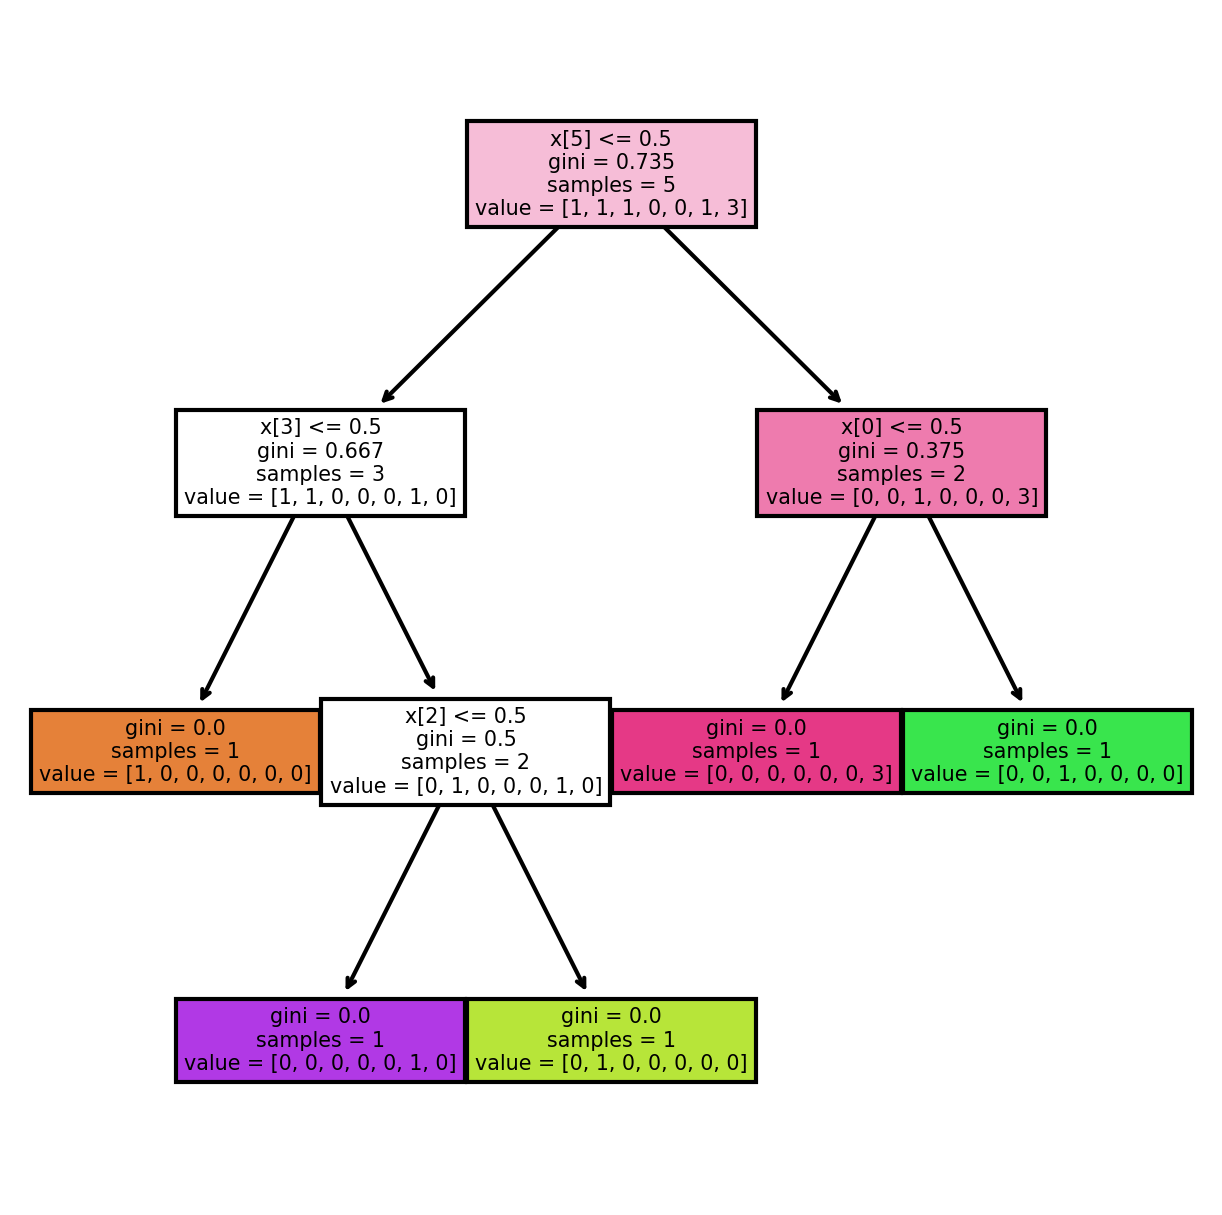

In [7]:
#Sientete libre de elegir alguno de los arboles:
numeroArbol = 18
arbolDelBosque = bosque.estimators_[numeroArbol]

plt.figure(figsize = (5,5), dpi = 300)
treeClassifier.plot_tree(arbolDelBosque,filled = True);
plt.show()

# clasificación con iris

In [24]:
from sklearn.datasets import load_iris
data = load_iris()
import pandas as pd
from sklearn.model_selection import train_test_split

In [33]:
X = data["data"]
y = data.target
#y.rename(columns = {0: 'setosa', 1:'versicolor', 2:'virginica'}, inplace = True)


In [15]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X,y)

In [35]:
bosque_iris = forest(n_estimators = 1000)
bosque_iris.fit(x_train,y_train)


RandomForestClassifier(n_estimators=1000)

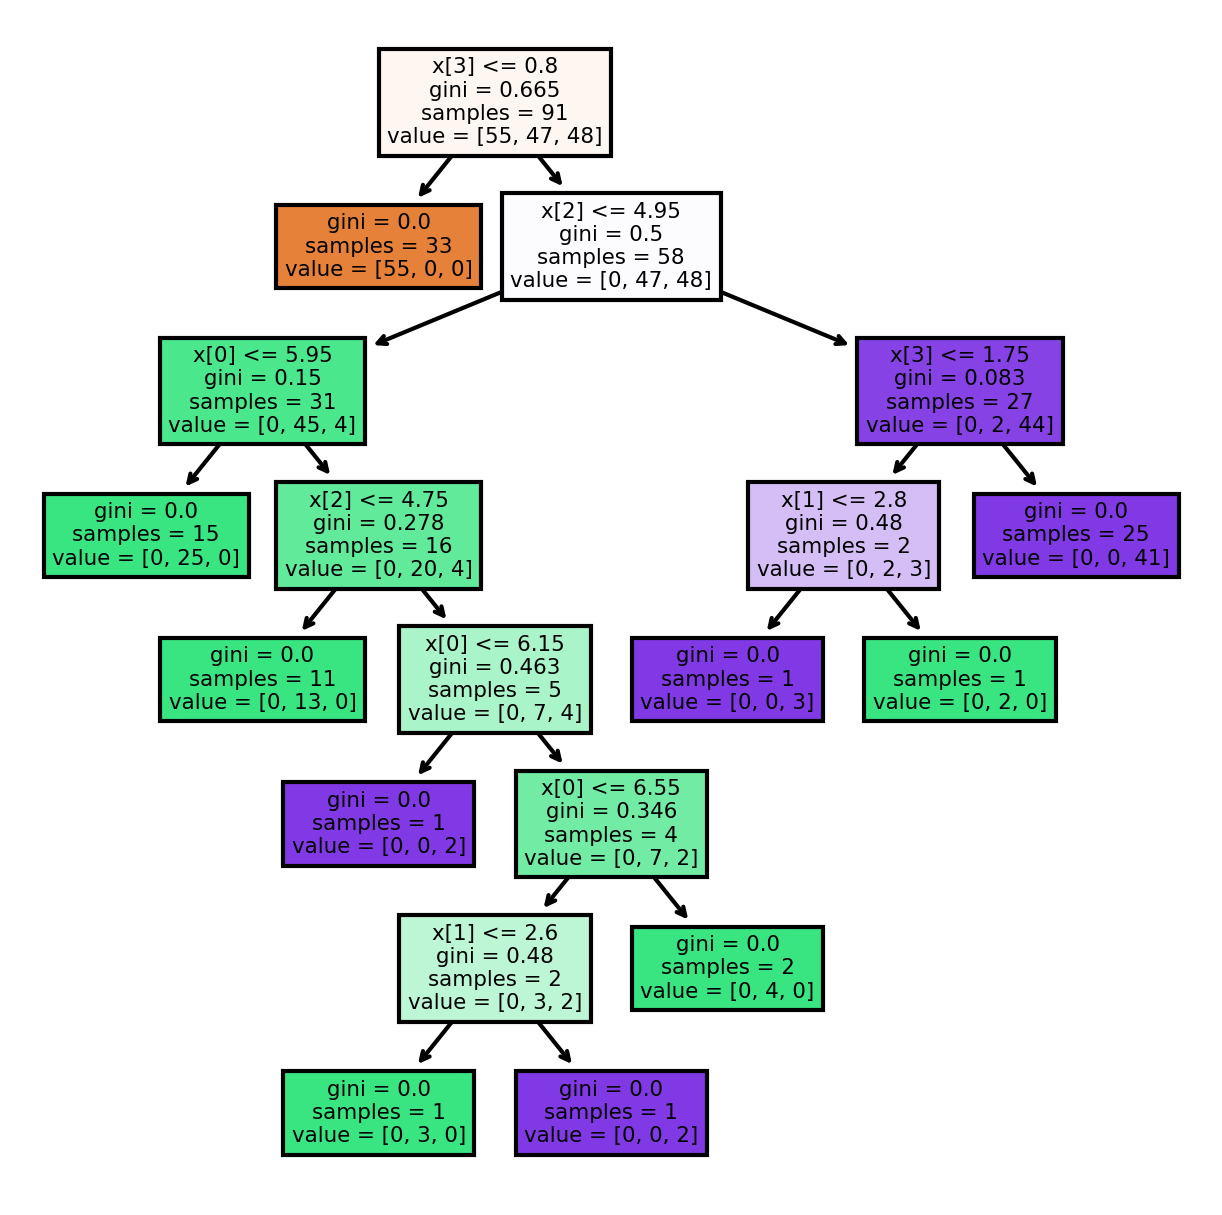

In [20]:
numeroArbol = 18
arbolDelBosque = bosque_iris.estimators_[numeroArbol]

plt.figure(figsize = (5,5), dpi = 300)
treeClassifier.plot_tree(arbolDelBosque,filled = True);
plt.show()

In [37]:
y_predicha = bosque_iris.predict(x_test)
resultados = pd.DataFrame({'real': y_test, 'predicha': y_predicha})
resultados

,real,predicha
0,0,0
1,2,2
2,2,2
3,2,2
4,2,2
5,2,2
6,1,2
7,1,1
8,1,1
9,0,0


In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_predicha)
accuracy_score(y_test,y_predicha)

0.9736842105263158

# Regresión para predicción de precios con california housing

In [40]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [41]:
data = fetch_california_housing()
X = pd.DataFrame(data["data"], columns = data["feature_names"])
y = data.target

In [44]:
X.drop(['Latitude', 'Longitude'], axis = 1 ,inplace=True)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X,y)
arbol = DecisionTreeRegressor(max_depth = 30)
bosque = RandomForestRegressor(n_estimators=100, max_depth = 30)

In [48]:
arbol.fit(x_train, y_train)
bosque.fit(x_test, y_test)

RandomForestRegressor(max_depth=30)

In [49]:
y_arbol = arbol.predict(x_test)
y_bosque = bosque.predict(x_test)
resultados = pd.DataFrame({'real': y_test, 'arbol': y_arbol, 'bosque':y_bosque})
print("MSE para el arbol: {}".format(mean_squared_error(y_test,y_arbol)))
print("MSE para el bosque: {}".format(mean_squared_error(y_test,y_bosque)))
resultados

MSE para el arbol: 0.8095556616274012
MSE para el bosque: 0.060515713581214735


,real,arbol,bosque
0,1.878,1.421,1.65456
1,0.875,0.994,1.09139
2,4.638,3.852,4.18231
3,1.958,3.766,2.26238
4,1.853,3.458,2.50706
...,...,...,...
5155,2.718,2.861,2.89245
5156,1.670,1.371,1.57525
5157,2.289,3.435,2.54118
5158,1.397,1.293,1.58450
